In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/n2/9hl8ftpn3j379grs52lt_3q80000gn/T/ipykernel_63922/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# User Interaction

In [2]:
df_interaction = pd.read_csv('../datasets/fashion/customer_interactions.csv')
df_interaction

,customer_id,page_views,time_spent
0,1,76.180559,715.632261
1,2,135.711554,1047.330660
2,3,82.700736,747.054566
3,4,216.917338,940.321136
4,5,117.082613,543.919926
...,...,...,...
95,96,98.894857,579.659756
96,97,160.869834,972.985162
97,98,245.408514,1873.464434
98,99,197.346790,357.087043


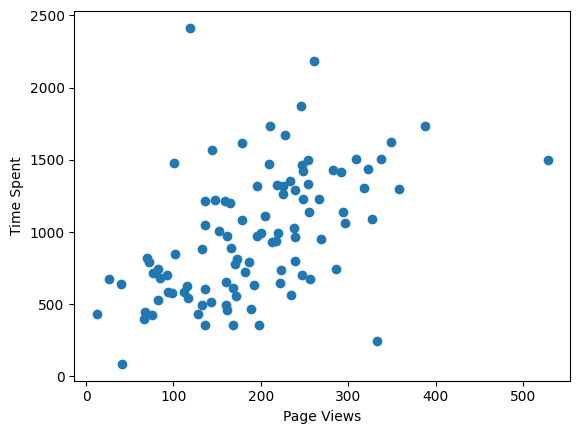

In [3]:
plt.scatter(df_interaction['page_views'], df_interaction['time_spent'])
plt.xlabel('Page Views')
plt.ylabel('Time Spent')
plt.show()

# Product Detials

In [4]:
df_product = pd.read_csv('../datasets/fashion/product_details.csv', sep=';')
df_product = df_product.loc[:, ~df_product.columns.str.contains('^Unnamed')]
df_product

,category,product_id,ratings,price
0,Dress,0,3.270463,53.916667
1,Dress,1,2.879264,44.500000
2,Dress,2,2.673620,47.666667
3,Dress,3,3.689981,50.200000
4,Dress,4,3.282323,51.125000
...,...,...,...,...
70,T-shirt,70,2.436425,56.500000
71,T-shirt,71,2.636504,72.166667
72,T-shirt,72,3.548573,65.750000
73,T-shirt,73,2.520955,52.818182


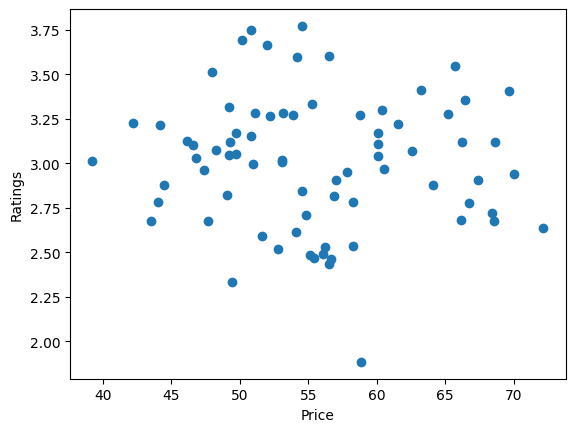

In [5]:
plt.scatter(df_product['price'], df_product['ratings'])
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.show()

# Purchase History

In [7]:
df_history = pd.read_csv('../datasets/fashion/purchase_history.csv', sep=';')
df_history = df_history.loc[:, ~df_history.columns.str.contains('^Unnamed')]
df_history

,customer_id,product_id,purchase_date
0,19,1,NaN
1,97,38,NaN
2,25,2,NaN
3,57,43,NaN
4,79,61,NaN
...,...,...,...
995,20,44,NaN
996,42,54,NaN
997,9,58,NaN
998,8,74,NaN


# Exploratory Data Analysis

## Likelyhood user interaction to purchase a product

In [8]:
df_user_purchase = df_history.groupby(by=['customer_id']).agg({'product_id': 'count'}).reset_index().rename(columns={'product_id': 'purchased_items'})

df_a = pd.merge(
    left=df_interaction,
    right=df_user_purchase,
    on=['customer_id'],
)
df_a

,customer_id,page_views,time_spent,purchased_items
0,1,76.180559,715.632261,9
1,2,135.711554,1047.330660,9
2,3,82.700736,747.054566,11
3,4,216.917338,940.321136,12
4,5,117.082613,543.919926,8
...,...,...,...,...
95,96,98.894857,579.659756,6
96,97,160.869834,972.985162,9
97,98,245.408514,1873.464434,14
98,99,197.346790,357.087043,8


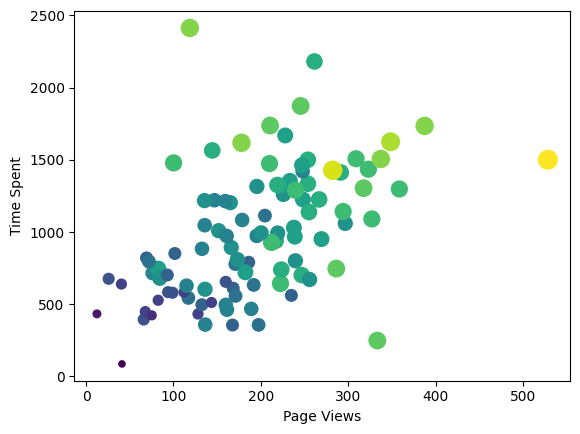

In [19]:
plt.scatter(df_a['page_views'], df_a['time_spent'], s=df_a['purchased_items'] * 10, c=df_a['purchased_items'])
plt.xlabel('Page Views')
plt.ylabel('Time Spent')
plt.show()